# Vehicle Maintenance prediction

<img  style="margin-left: 100px;" src="Screenshot 2025-04-16 203309.png">

# 1) Data Gathering

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from feature_engine.datetime import DatetimeFeatures
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,precision_recall_curve 
from sklearn.model_selection import learning_curve


from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier



import joblib  


In [2]:
df=pd.read_csv("vehicle_maintenance_data.csv")

In [3]:
df.shape

(50000, 20)

In [5]:
df.head(3)

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1


In [6]:
df['Need_Maintenance'].value_counts() #target colunm 

Need_Maintenance
1    40498
0     9502
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

In [8]:
df.isnull().mean()*100

Vehicle_Model           0.0
Mileage                 0.0
Maintenance_History     0.0
Reported_Issues         0.0
Vehicle_Age             0.0
Fuel_Type               0.0
Transmission_Type       0.0
Engine_Size             0.0
Odometer_Reading        0.0
Last_Service_Date       0.0
Warranty_Expiry_Date    0.0
Owner_Type              0.0
Insurance_Premium       0.0
Service_History         0.0
Accident_History        0.0
Fuel_Efficiency         0.0
Tire_Condition          0.0
Brake_Condition         0.0
Battery_Status          0.0
Need_Maintenance        0.0
dtype: float64

In [10]:
df.duplicated().sum()

0

In [39]:
nums=['Mileage','Reported_Issues','Vehicle_Age','Engine_Size','Odometer_Reading','Insurance_Premium','Service_History'
       ,'Accident_History',
      'Fuel_Efficiency','Need_Maintenance']

In [16]:
for i in nums: 
    print(df[i].kurtosis())

-1.1966298750198552
-1.2726477085119576
-1.2257879490058992
-1.3871273670867443
-1.207867677347591
-1.1973077892473032
-1.227194184595392
-1.363369435894384
-1.199197268318679
0.4968486463519377


In [3]:
num=[]
for i in df.columns: 
    if(len(set(df[i]))>12): 
        num.append(i)

In [4]:
cat=[col for col in df.columns if col not in num]

In [6]:
cat

['Vehicle_Model',
 'Maintenance_History',
 'Reported_Issues',
 'Vehicle_Age',
 'Fuel_Type',
 'Transmission_Type',
 'Engine_Size',
 'Owner_Type',
 'Service_History',
 'Accident_History',
 'Tire_Condition',
 'Brake_Condition',
 'Battery_Status',
 'Need_Maintenance']

In [6]:
df['Vehicle_Model'].value_counts()

Vehicle_Model
Bus           8414
Van           8400
SUV           8360
Truck         8328
Motorcycle    8295
Car           8203
Name: count, dtype: int64

In [5]:

num.remove('Last_Service_Date')


In [6]:
num.remove('Warranty_Expiry_Date')

In [7]:
date_time=['Last_Service_Date','Warranty_Expiry_Date']

In [8]:
data_col=['Last_Service_Date','Warranty_Expiry_Date']
cate=[col for col in df.columns if(col not in num and col not in data_col)]

In [10]:
cate

['Vehicle_Model',
 'Maintenance_History',
 'Reported_Issues',
 'Vehicle_Age',
 'Fuel_Type',
 'Transmission_Type',
 'Engine_Size',
 'Owner_Type',
 'Service_History',
 'Accident_History',
 'Tire_Condition',
 'Brake_Condition',
 'Battery_Status',
 'Need_Maintenance']

In [22]:
df['Vehicle_Model'].value_counts()

Vehicle_Model
Bus           8414
Van           8400
SUV           8360
Truck         8328
Motorcycle    8295
Car           8203
Name: count, dtype: int64

In [23]:
df.describe()

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,54931.232680,2.497420,5.492260,1556.292000,75551.187060,17465.340700,5.515560,1.50156,14.990323,0.809960
std,14401.912925,1.708781,2.875682,627.677218,43088.105658,7223.393401,2.874899,1.11951,2.885583,0.392336
min,30001.000000,0.000000,1.000000,800.000000,1001.000000,5000.000000,1.000000,0.00000,10.000098,0.000000
25%,42471.500000,1.000000,3.000000,1000.000000,38009.000000,11189.750000,3.000000,0.00000,12.489037,1.000000
50%,54810.000000,2.000000,5.000000,1500.000000,75598.500000,17477.500000,6.000000,2.00000,14.986352,1.000000
75%,67391.500000,4.000000,8.000000,2000.000000,112999.500000,23692.000000,8.000000,3.00000,17.474676,1.000000
max,80000.000000,5.000000,10.000000,2500.000000,149999.000000,30000.000000,10.000000,3.00000,19.999968,1.000000


# DATA UNDERSTANDING (EDA)

In [24]:
# NUMERCAL Anylsis of data  
len(nums)

10

<Axes: xlabel='Mileage', ylabel='Density'>

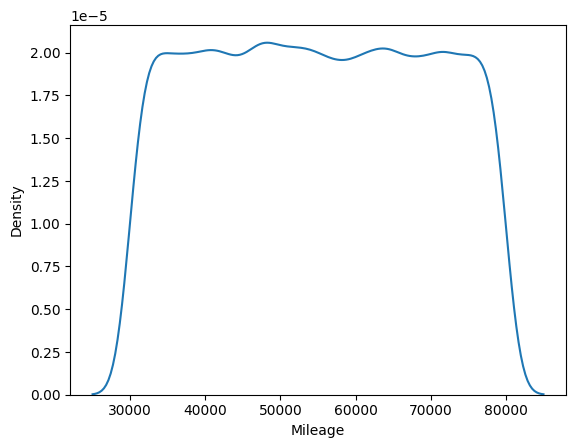

In [25]:
sns.kdeplot(df[nums[0]])

<Axes: xlabel='Reported_Issues', ylabel='Density'>

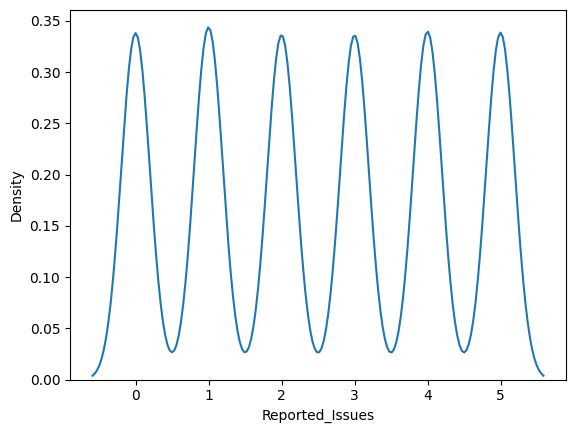

In [26]:
sns.kdeplot(df[nums[1]])

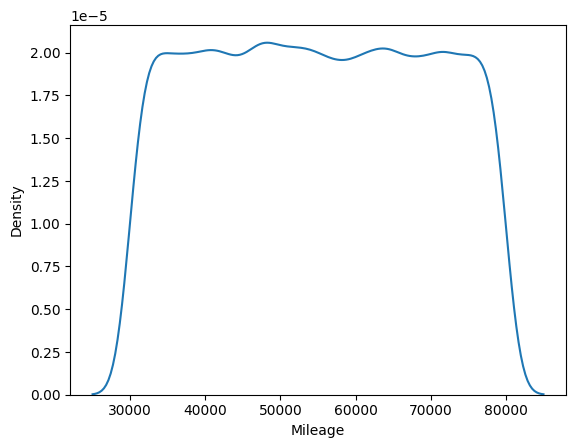

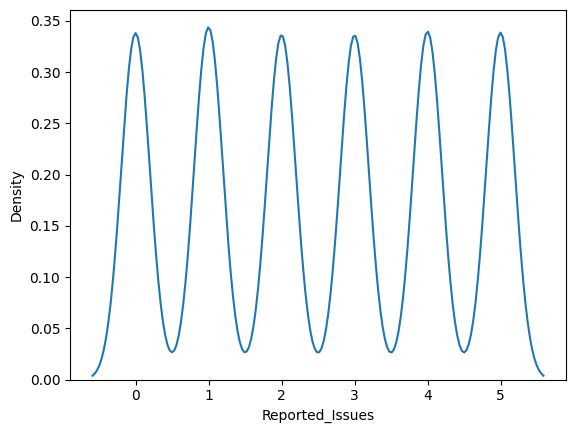

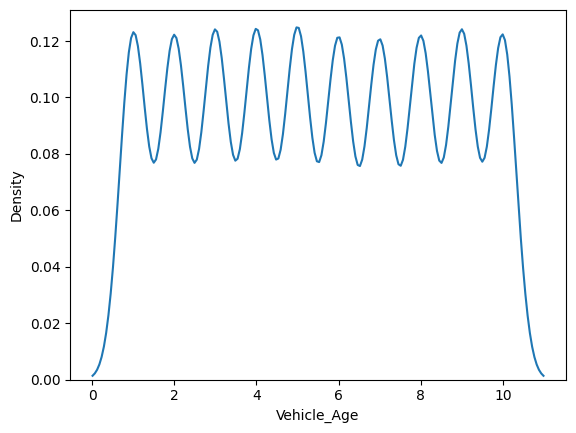

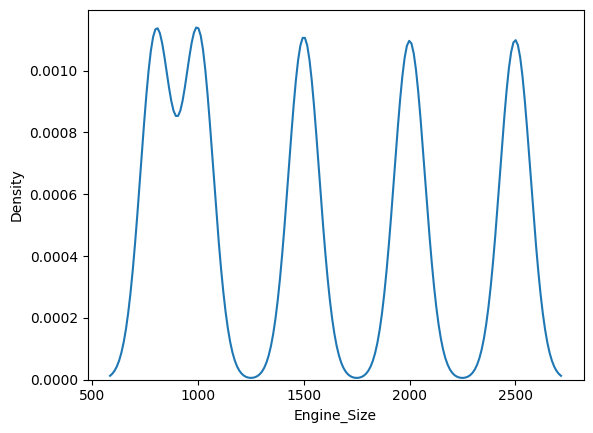

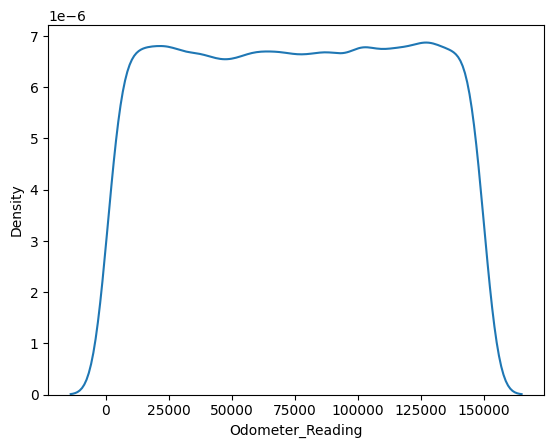

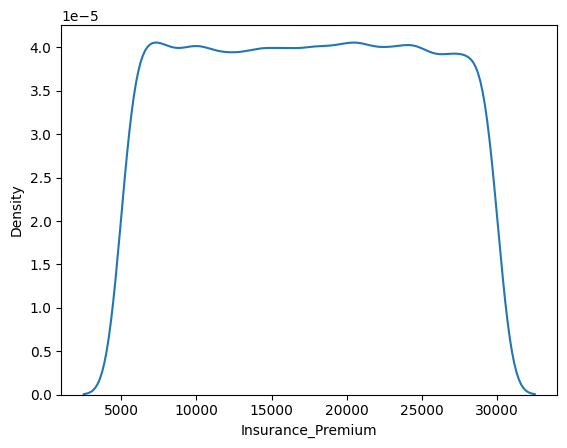

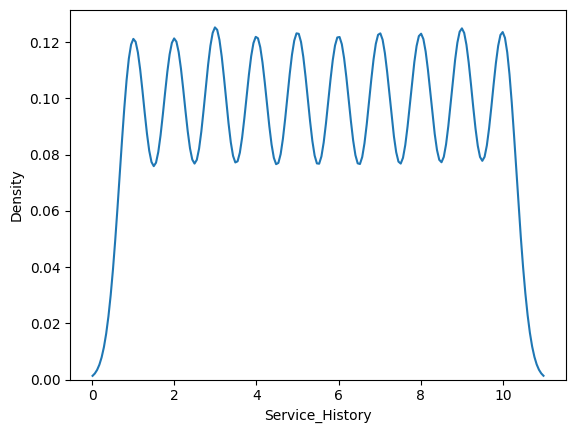

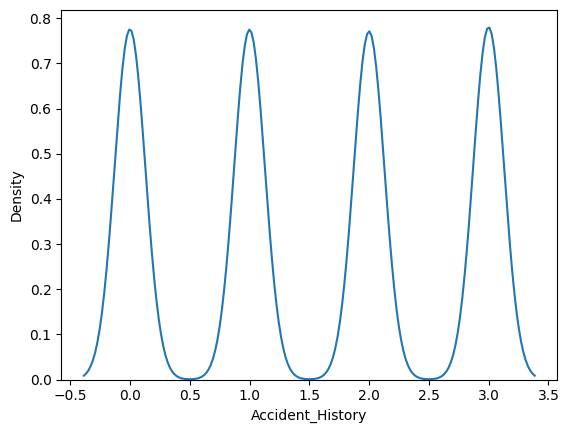

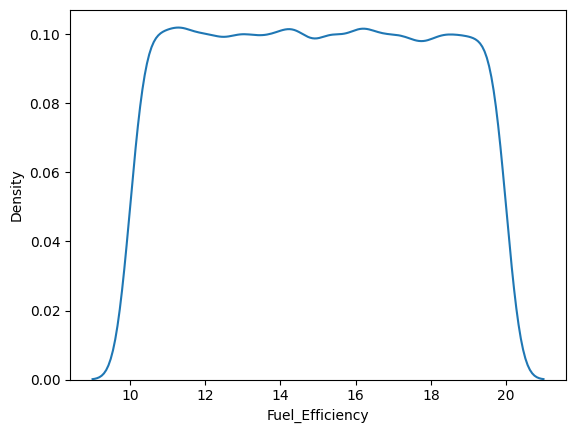

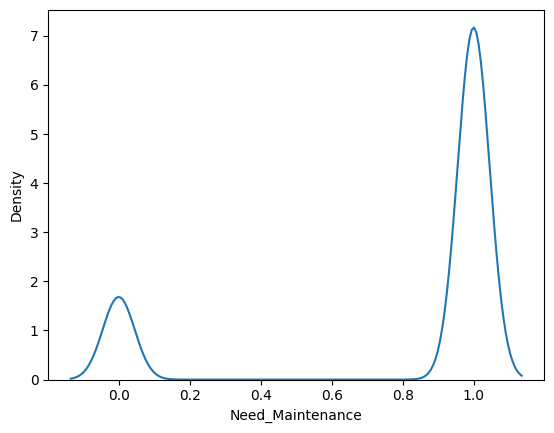

In [43]:
for col in nums : 
    sns.kdeplot(data=df[col])
    plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

In [41]:
len(nums)

10

In [44]:
for i in nums : 
    num_df[i]=df[i]

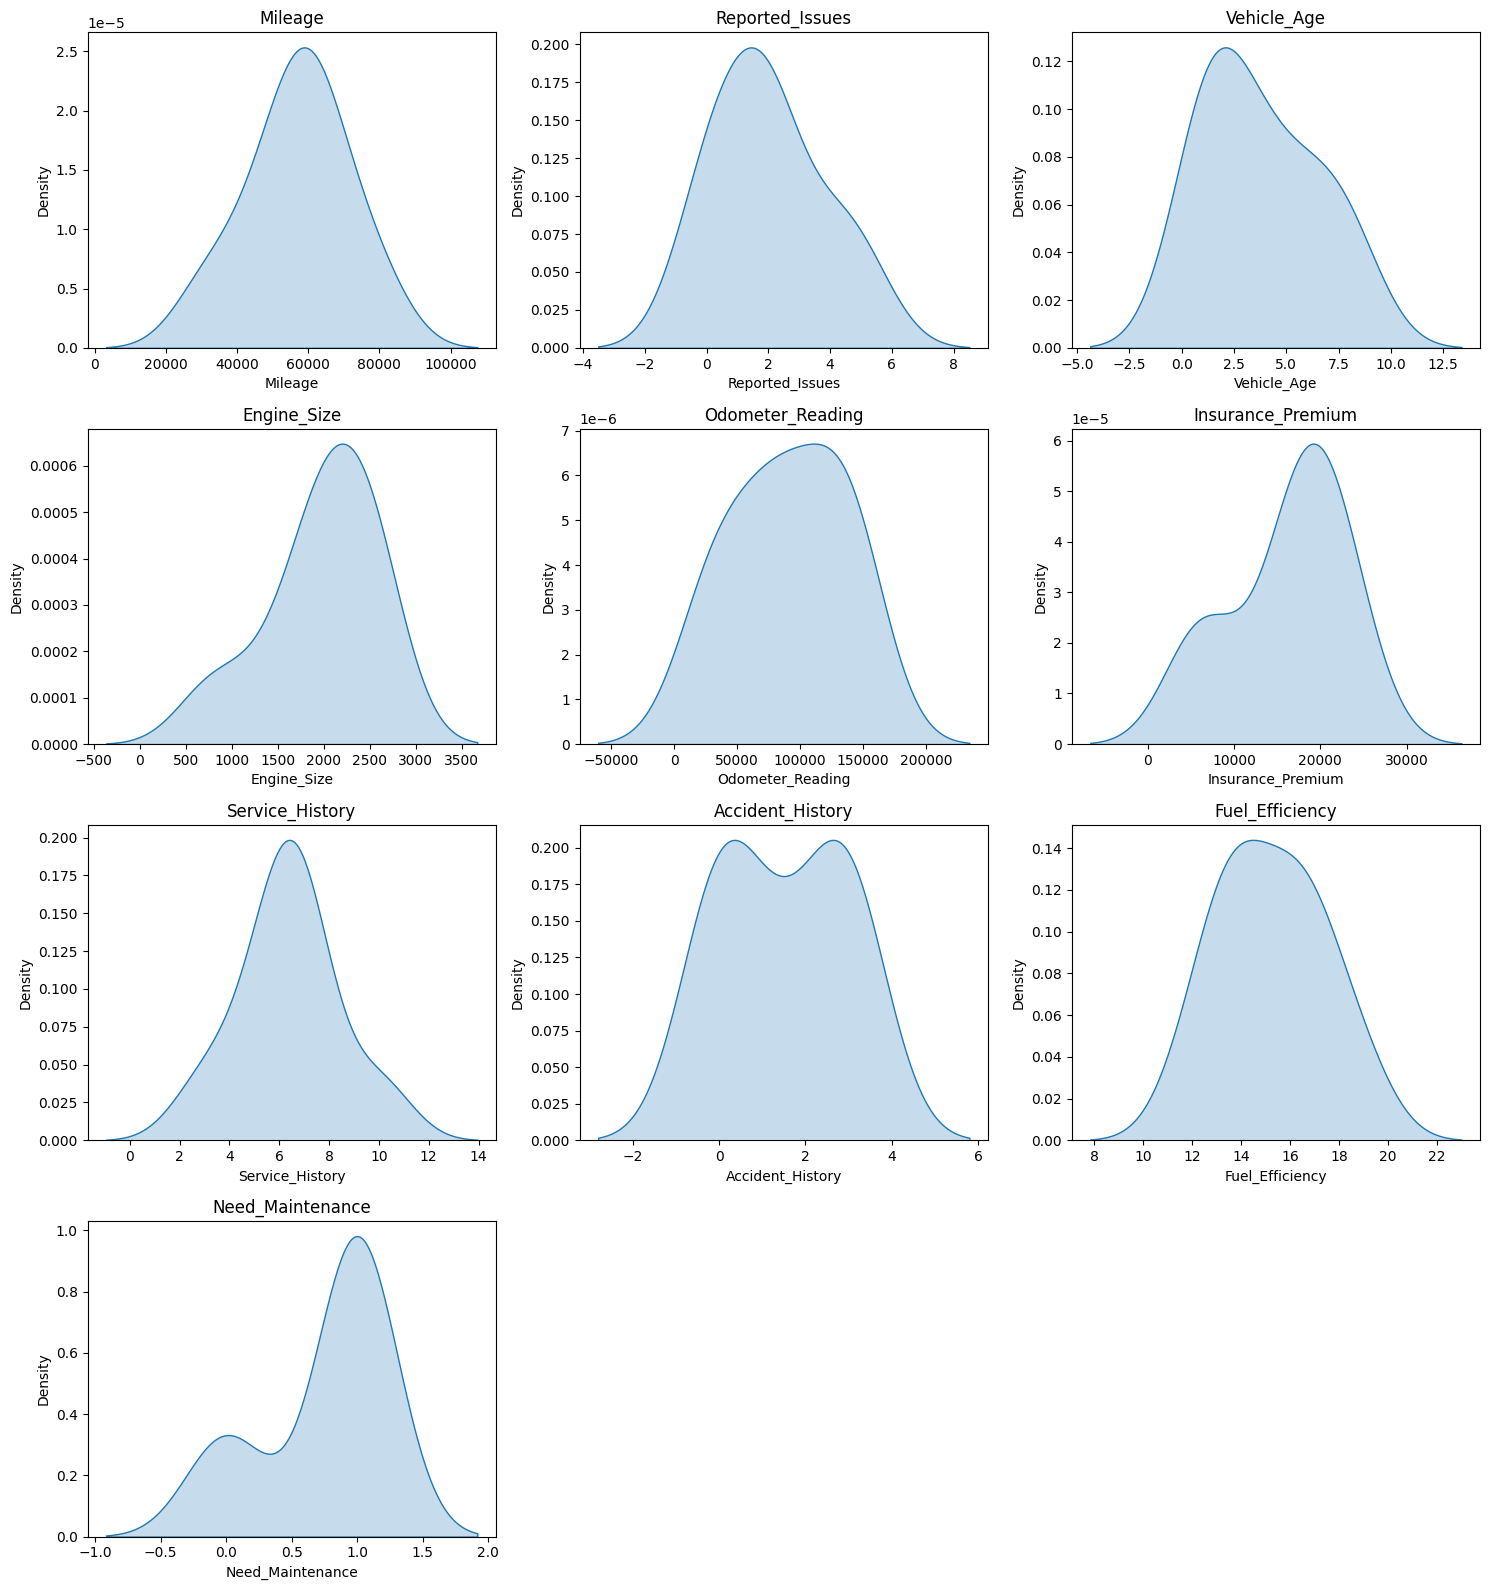

In [53]:
num_df_numeric = num_df.select_dtypes(include=['number'])

num_cols = len(num_df_numeric.columns)
cols = 3  
rows = int(np.ceil(num_cols / cols))

fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axs = axs.flatten()

for i, col in enumerate(num_df_numeric.columns): 
    sns.kdeplot(data=num_df_numeric, x=col, ax=axs[i], fill=True)
    axs[i].set_title(col)

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

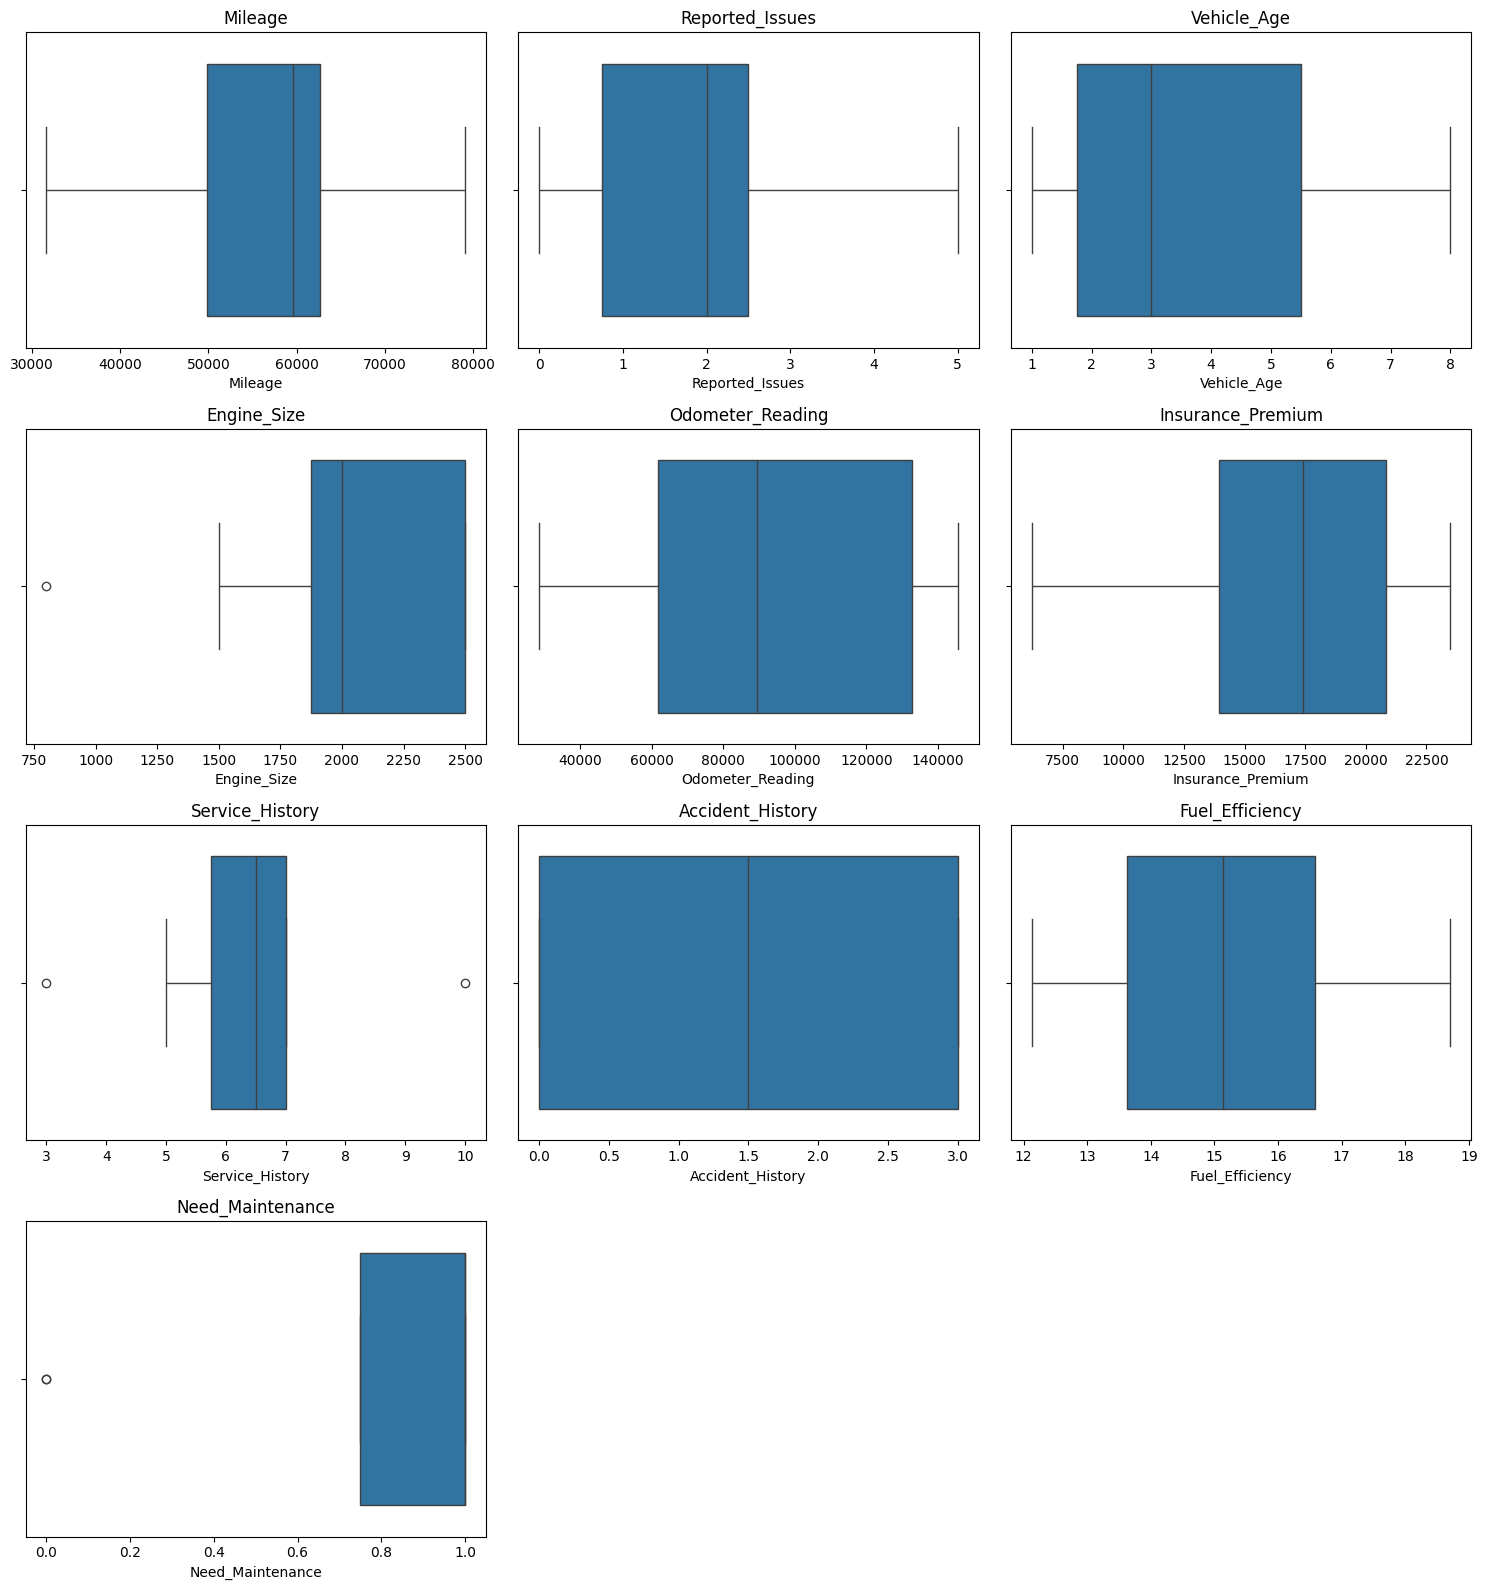

In [58]:
fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axs = axs.flatten()

for i, col in enumerate(num_df_numeric.columns): 
    sns.boxplot(x=num_df[col], ax=axs[i])
    axs[i].set_title(col)

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

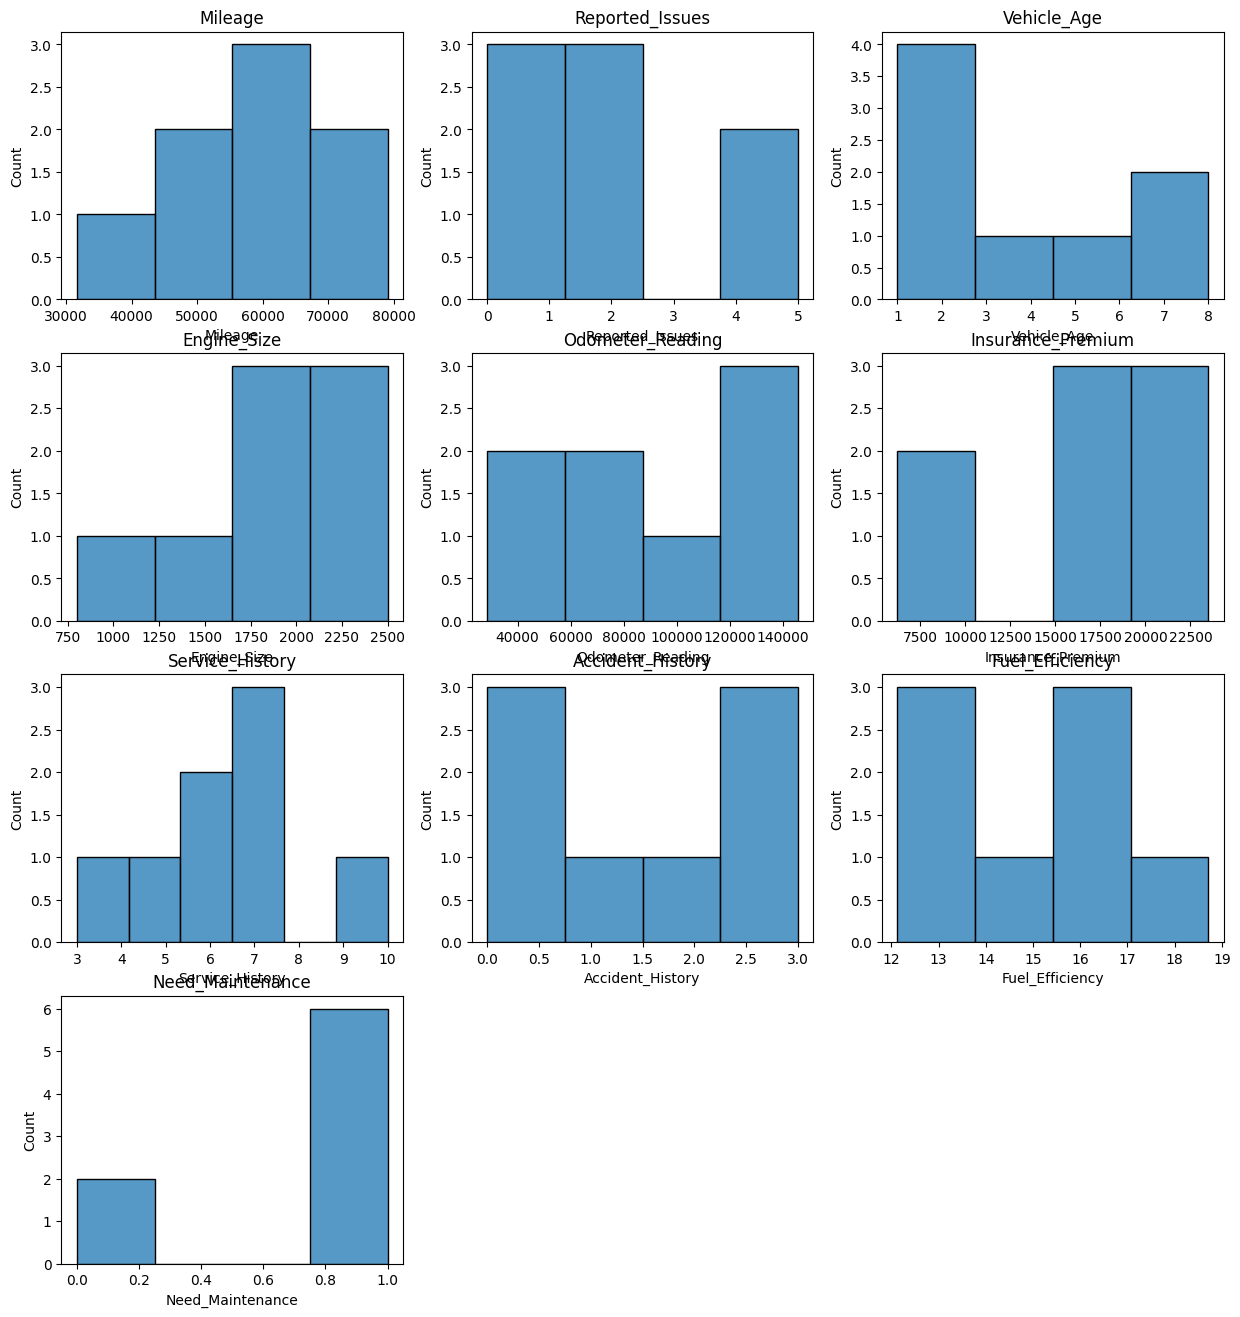

In [73]:
fig,axs = plt.subplots(rows,cols , figsize=(5 * cols, 4 * rows)) 
axs=axs.flatten()

for i , col in enumerate(num_df_numeric.columns): 
    sns.histplot(data=num_df,x=col,ax=axs[i]) 
    axs[i].set_title(col)

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tick_params()
plt.show()

In [74]:
# binary work categoral working  
cate

['Vehicle_Model',
 'Maintenance_History',
 'Fuel_Type',
 'Transmission_Type',
 'Last_Service_Date',
 'Warranty_Expiry_Date',
 'Owner_Type',
 'Tire_Condition',
 'Brake_Condition',
 'Battery_Status']

In [96]:
cat_df=pd.DataFrame()
for i in cate: 
    cat_df[i]=df[i]

In [77]:
cat_df

,Vehicle_Model,Maintenance_History,Fuel_Type,Transmission_Type,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Tire_Condition,Brake_Condition,Battery_Status
0,Truck,Good,Electric,Automatic,2023-11-23,2025-06-24,Second,New,New,Weak
1,Van,Average,Electric,Automatic,2023-09-21,2025-06-04,Second,New,New,Weak
2,Bus,Poor,Electric,Automatic,2023-06-27,2025-04-27,First,New,Good,Weak
3,Bus,Average,Petrol,Automatic,2023-08-24,2025-11-05,Second,New,Worn Out,New
4,Bus,Poor,Petrol,Manual,2023-05-25,2025-09-14,Third,Good,Good,Weak
...,...,...,...,...,...,...,...,...,...,...
49995,Car,Good,Diesel,Automatic,2023-11-24,2025-09-15,Third,New,Good,Weak
49996,Truck,Good,Diesel,Manual,2023-07-14,2025-01-21,Second,Worn Out,New,Good
49997,Van,Poor,Electric,Automatic,2023-09-09,2024-11-09,First,Worn Out,Worn Out,Weak
49998,Car,Good,Electric,Manual,2023-08-26,2025-05-22,Third,New,Good,Weak


In [82]:
for i in cat_df.columns: 
    print(df[i].value_counts())
    print()
    print()

Vehicle_Model
Bus           8414
Van           8400
SUV           8360
Truck         8328
Motorcycle    8295
Car           8203
Name: count, dtype: int64


Maintenance_History
Average    16724
Good       16712
Poor       16564
Name: count, dtype: int64


Fuel_Type
Diesel      16738
Petrol      16680
Electric    16582
Name: count, dtype: int64


Transmission_Type
Manual       25009
Automatic    24991
Name: count, dtype: int64


Last_Service_Date
2023-11-25    182
2023-08-08    181
2023-11-14    179
2023-10-03    177
2023-12-11    175
             ... 
2023-11-09    122
2023-11-08    122
2023-11-16    121
2024-01-21    120
2023-05-07    116
Name: count, Length: 336, dtype: int64


Warranty_Expiry_Date
2024-09-16    101
2025-05-13     99
2025-06-06     98
2024-05-17     95
2024-07-31     94
             ... 
2025-07-29     50
2025-02-12     49
2025-10-17     48
2026-01-10     47
2025-11-27     44
Name: count, Length: 701, dtype: int64


Owner_Type
Second    16875
Third     16630
First    

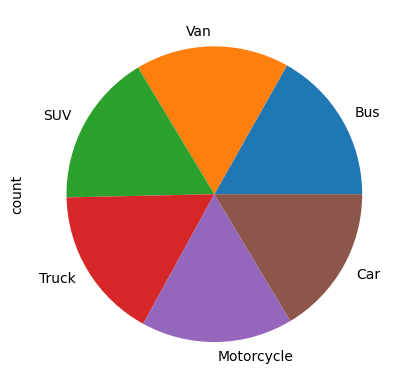

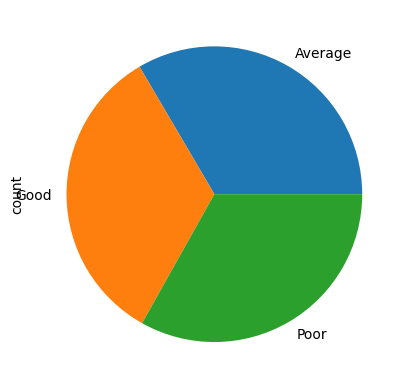

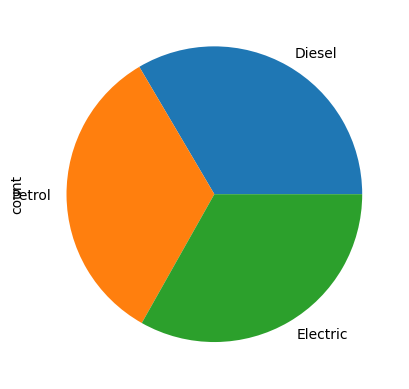

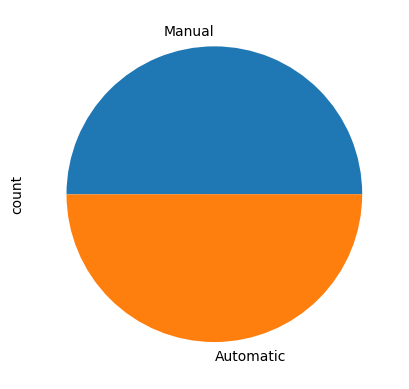

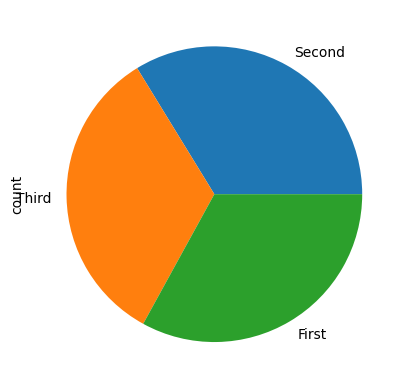

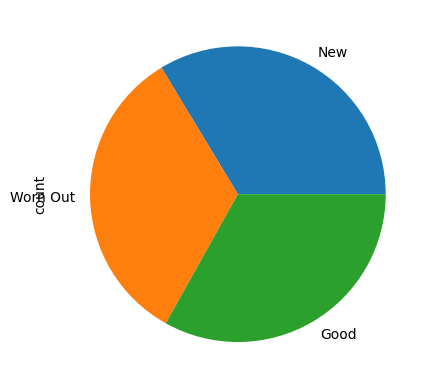

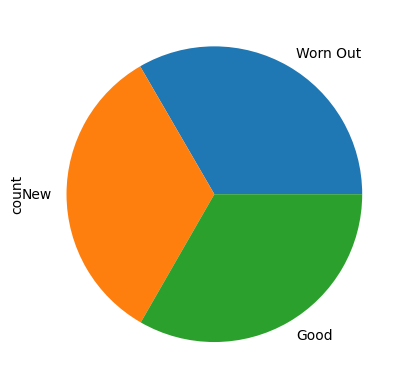

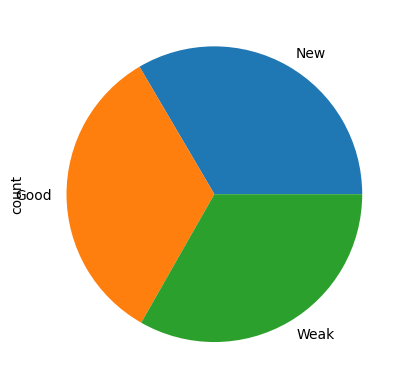

In [97]:
for i in cat_df: 
    cat_df[i].value_counts().plot(kind='pie')
    plt.show()

In [98]:
cat_df.shape

(50000, 8)

In [99]:
# bivalnte anylsis of data : : : : : ; 

In [103]:
#traget colums 
# the give code will woked according 
from sklearn.preprocessing import LabelEncoder 
lab=LabelEncoder()
df['target']=lab.fit_transform(df['Need_Maintenance'])

In [106]:
df=df.drop(columns='target')

In [107]:
df.shape

(50000, 20)

In [112]:
num_df=num_df.drop(columns=0)

In [113]:
num_df

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance
0,58765,0,4,2000,28524,20782,6,3,13.622204,1
1,60353,1,7,2500,133630,23489,7,0,13.625307,1
2,68072,0,2,1500,34022,17979,7,0,14.306302,1
3,60849,4,5,2500,81636,6220,7,3,18.709467,1
4,45742,5,1,2000,97162,16446,6,2,16.977482,1
5,31653,2,1,800,70954,16813,5,3,15.954422,0
6,51211,2,8,2500,145563,21057,10,0,16.455703,0
7,79093,2,2,2000,132354,6498,3,1,12.128404,1


<Axes: xlabel='Fuel_Efficiency', ylabel='Accident_History'>

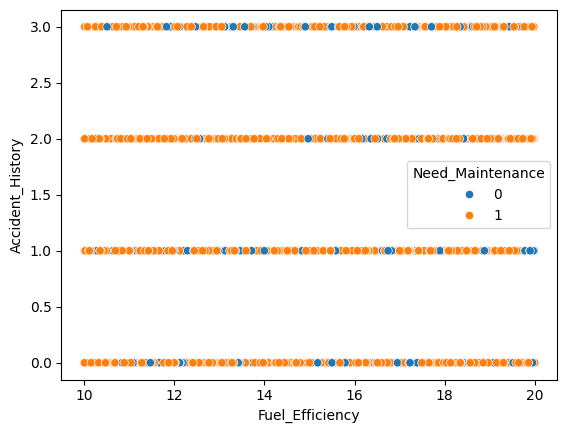

In [133]:
sns.scatterplot(df,x='Fuel_Efficiency',y='Accident_History',hue='Need_Maintenance')

<Axes: xlabel='Mileage', ylabel='Odometer_Reading'>

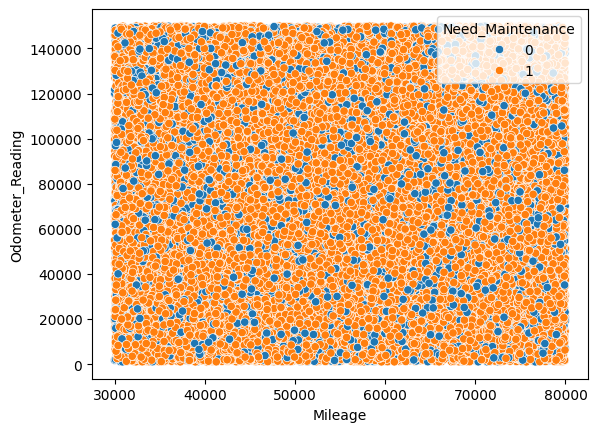

In [129]:
sns.scatterplot(df,x='Mileage',y='Odometer_Reading',hue='Need_Maintenance')

<Axes: xlabel='Mileage', ylabel='Fuel_Efficiency'>

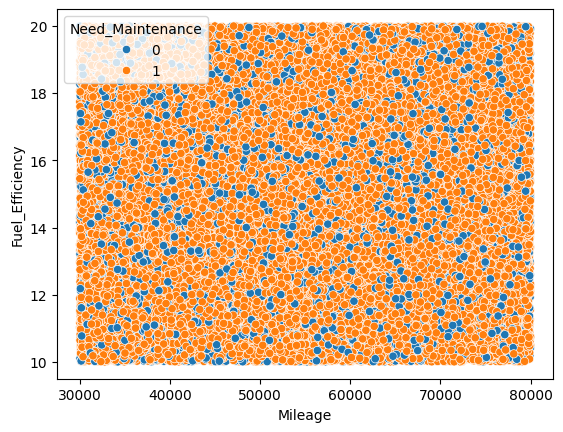

In [130]:
sns.scatterplot(df,x='Mileage',y='Fuel_Efficiency',hue='Need_Maintenance')

<Axes: xlabel='Odometer_Reading', ylabel='Fuel_Efficiency'>

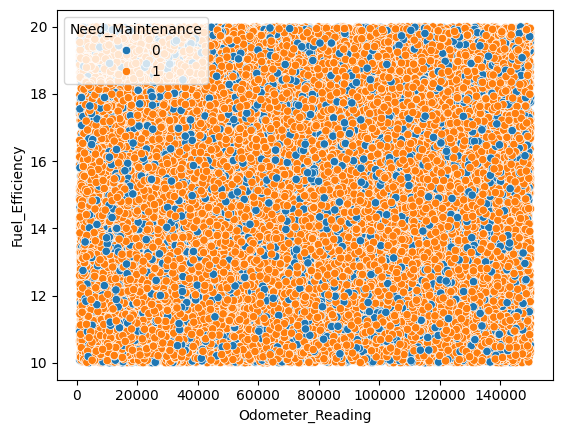

In [131]:
sns.scatterplot(df,x='Odometer_Reading',y='Fuel_Efficiency',hue='Need_Maintenance')

In [115]:
set(df['Reported_Issues'])

{0, 1, 2, 3, 4, 5}

In [117]:
set(df['Service_History']) # Engine_Size

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [119]:
set(df['Accident_History']) # Vehicle_Age

{0, 1, 2, 3}

In [120]:
df['Accident_History'].value_counts()

Accident_History
3    12577
0    12505
1    12489
2    12429
Name: count, dtype: int64

In [123]:
num_df.shape

(8, 10)

In [134]:
data_col

['Last_Service_Date', 'Warranty_Expiry_Date']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

In [10]:
df

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Car,77229,Good,3,6,Diesel,Automatic,2500,97404,2023-11-24,2025-09-15,Third,5217,4,1,10.357298,New,Good,Weak,1
49996,Truck,54742,Good,4,4,Diesel,Manual,800,13421,2023-07-14,2025-01-21,Second,15856,4,1,14.924022,Worn Out,New,Good,1
49997,Van,75601,Poor,0,4,Electric,Automatic,1500,124851,2023-09-09,2024-11-09,First,6019,10,0,19.859243,Worn Out,Worn Out,Weak,1
49998,Car,66181,Good,1,7,Electric,Manual,2500,103182,2023-08-26,2025-05-22,Third,5030,4,3,10.720555,New,Good,Weak,1


In [9]:
cat.remove('Need_Maintenance')

In [10]:
X=df.iloc[:,:-1]
y=df['Need_Maintenance']


In [11]:
# Data Spliting 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Data Prerocessing on give code 

In [39]:
cat

['Vehicle_Model',
 'Maintenance_History',
 'Reported_Issues',
 'Vehicle_Age',
 'Fuel_Type',
 'Transmission_Type',
 'Engine_Size',
 'Owner_Type',
 'Service_History',
 'Accident_History',
 'Tire_Condition',
 'Brake_Condition',
 'Battery_Status']

In [40]:
date_time

['Last_Service_Date', 'Warranty_Expiry_Date']

In [12]:
dt_cols = date_time

num_cols = num

cat_cols = cat

In [13]:
num_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="median")),
	("scaler", StandardScaler())
])



In [14]:
cat_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])



In [15]:
doj_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("extractor", DatetimeFeatures(features_to_extract=["month", "week", "day_of_week", "day_of_month"], format="mixed")),
	("scaler", StandardScaler())
])

time_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("extractor", DatetimeFeatures(features_to_extract=["hour", "minute"], format="mixed")),
	("scaler", StandardScaler())
])

In [16]:
preprocessor = ColumnTransformer(transformers=[
	("num", num_transformer, num_cols),
	("cat", cat_transformer, cat_cols),
	#("doj", doj_transformer, ["Last_Service_Date",'Warranty_Expiry_Date']),
])


In [17]:
preprocessor.fit_transform(X_train)

array([[ 0.64899052,  1.00526103,  0.21898447, ...,  0.        ,
         0.        ,  1.        ],
       [-1.0749097 ,  0.41320186,  1.69920885, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54244762, -0.8323336 , -0.05005903, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.67067596, -1.02454343, -1.67374556, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.35100334,  0.49415551,  0.36327828, ...,  1.        ,
         0.        ,  0.        ],
       [-1.63002873,  0.29897576, -0.56804747, ...,  0.        ,
         0.        ,  1.        ]])

In [18]:
algorithms = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=10),
    "XG Boost": XGBClassifier(n_estimators=10)
}

In [27]:
def plot_learning_curver(name, algorithm, figsize=(12, 4)):
    model = Pipeline(steps=[
        ("pre", preprocessor),
        ("alg", algorithm)
    ])

    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=3,
        scoring="accuracy", 
        n_jobs=-1,
        random_state=42
    )

    mean_train_score = np.mean(train_scores, axis=1)
    std_train_score = np.std(train_scores, axis=1)
    train_label = f"Train {mean_train_score[-1]:.2f} ± {std_train_score[-1]:.2f}"

    mean_test_score = np.mean(test_scores, axis=1)
    std_test_score = np.std(test_scores, axis=1)
    test_label = f"Test {mean_test_score[-1]:.2f} ± {std_test_score[-1]:.2f}"

    fig, ax = plt.subplots(figsize=figsize)

    plot_curves(train_sizes, mean_train_score, std_train_score, train_label, ax)
    plot_curves(train_sizes, mean_test_score, std_test_score, test_label, ax)

    ax.set(xlabel="Training Set Size", ylabel="Accuracy", title=name)
    ax.legend(loc="lower right")
    plt.show()

In [28]:
# Helper function to plot curves
def plot_curves(sizes, mean_scores, std_scores, label, ax):
    ax.plot(sizes, mean_scores, marker="o", label=label)
    ax.fill_between(sizes, mean_scores - std_scores, mean_scores + std_scores, alpha=0.3)

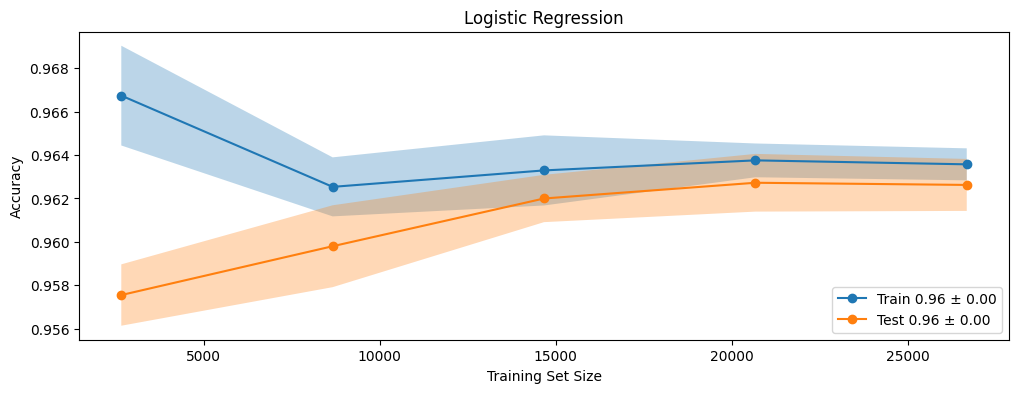

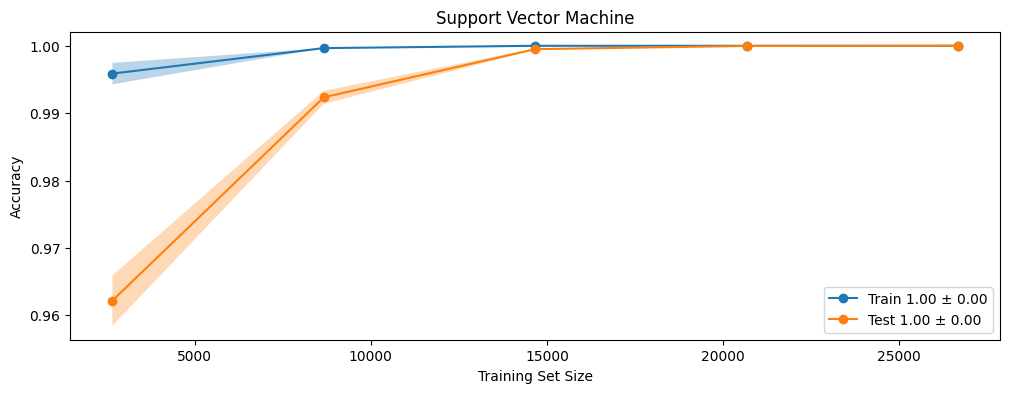

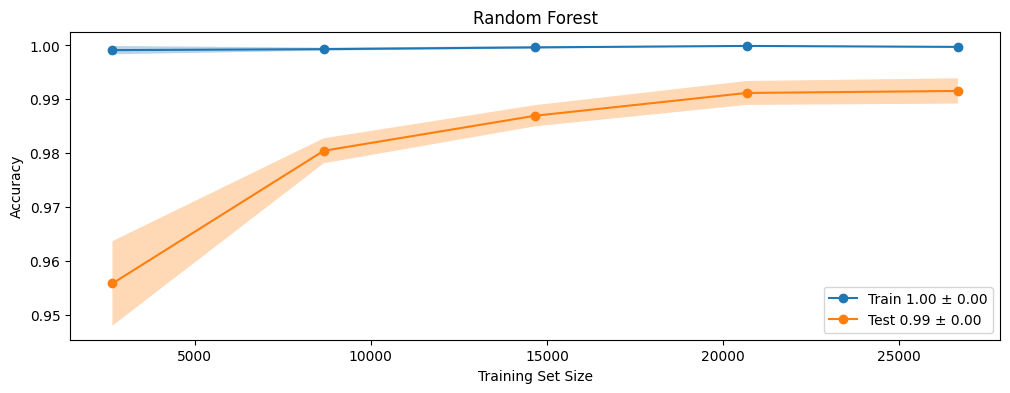

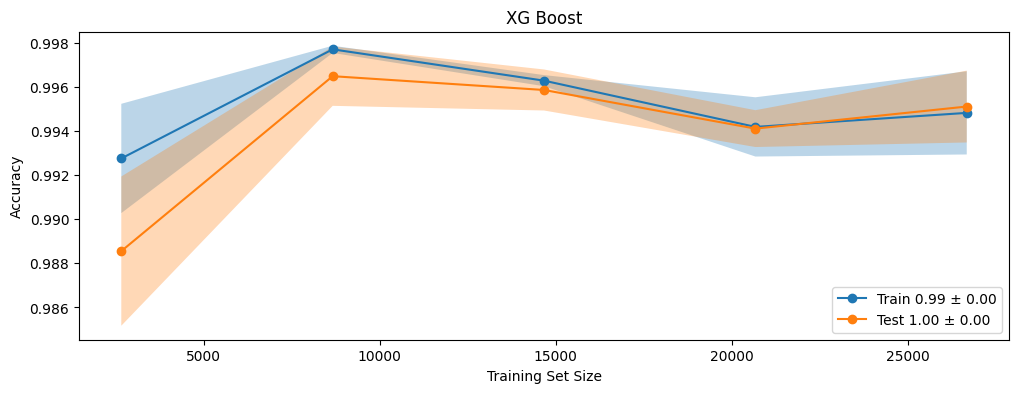

In [29]:
for name,alg in algorithms.items(): 
    plot_learning_curver(name,alg)

# 8.Model Peresistance 

In [19]:
model = Pipeline( steps=[
    ("pre",preprocessor), 
    ('rf',LogisticRegression())
])

In [20]:
model.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Mileage',
                                                   'Odometer_Reading',
                                                   'Insurance_Premium',
                                                   'Fuel_Efficiency']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Vehicle_Model',
                                                   'Maintenance_History',
                                                   'Reported_Issues',
                                                   'Vehicle_Age', 'Fuel_Type',
                                                   'Transmission_Type',
                                                   'Engine_Size', 'Owner_Type',
                                                   'Service_History',
                                                   'Accident_History',
                                                   'Tire_Condition',
                                                   'Brake_Condition',
                                                   'Battery_Status'])])),
                ('rf', LogisticRegression())])

In [21]:
y_pred =model.predict(X_test)  

In [22]:
accuracy_score(y_test,y_pred)

0.9632

In [57]:
len(num)

4

In [58]:
len(cat)

13

In [56]:
df

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Car,77229,Good,3,6,Diesel,Automatic,2500,97404,2023-11-24,2025-09-15,Third,5217,4,1,10.357298,New,Good,Weak,1
49996,Truck,54742,Good,4,4,Diesel,Manual,800,13421,2023-07-14,2025-01-21,Second,15856,4,1,14.924022,Worn Out,New,Good,1
49997,Van,75601,Poor,0,4,Electric,Automatic,1500,124851,2023-09-09,2024-11-09,First,6019,10,0,19.859243,Worn Out,Worn Out,Weak,1
49998,Car,66181,Good,1,7,Electric,Manual,2500,103182,2023-08-26,2025-05-22,Third,5030,4,3,10.720555,New,Good,Weak,1


In [30]:
m=pd.DataFrame(df.iloc[0,:-1])

In [31]:
model.predict(df[m])

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
m

,0
Vehicle_Model,Truck
Mileage,58765
Maintenance_History,Good
Reported_Issues,0
Vehicle_Age,4
Fuel_Type,Electric
Transmission_Type,Automatic
Engine_Size,2000
Odometer_Reading,28524
Last_Service_Date,2023-11-23


In [ ]:
import pic